In [20]:
import numpy as np
import matplotlib.pyplot as plt

from broadpy import InstrumentalBroadening
from broadpy.utils import load_example_data

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# load PHOENIX model (R~1e6)
wave, flux = load_example_data()

In [22]:
# Instrumental Broadening at a given resolution (or FWHM)
R = 1e5
fwhm = 2.998e5/R
flux_broadpy = InstrumentalBroadening(wave, flux)(res=R, kernel='gaussian')
# or equivalently
flux_broadpy_fwhm = InstrumentalBroadening(wave, flux)(fwhm=fwhm, kernel='gaussian')
assert np.allclose(flux_broadpy, flux_broadpy_fwhm)

In [23]:
# variable resolution gaussian kernel
# test with a fixed fwhm array
fwhms = np.ones_like(wave) * fwhm
flux_broadpy_fwhm_variable_test = InstrumentalBroadening(wave, flux)(fwhm=fwhms, kernel='gaussian_variable')
# assert np.allclose(flux_broadpy_fwhm, flux_broadpy_fwhm_variable_test, rtol=1e-6) # **False** because of edge effects
n_edge = 2 * int(np.mean(wave) / np.mean(np.diff(wave)) / R)
assert np.allclose(flux_broadpy_fwhm[n_edge:-n_edge], flux_broadpy_fwhm_variable_test[n_edge:-n_edge], rtol=1e-10)

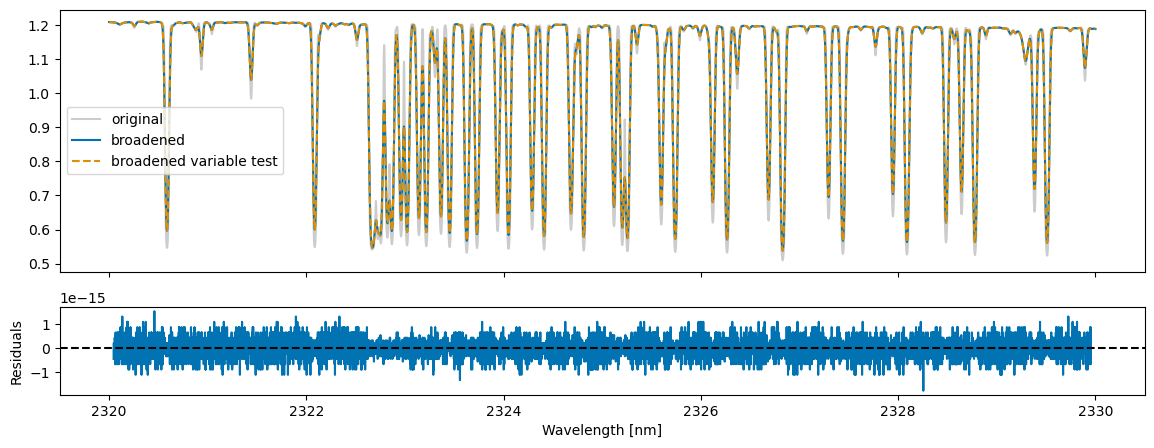

 Identical down to numerical precision!


In [24]:
# plot
fig, ax = plt.subplots(2, 1, figsize=(14, 5), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].plot(wave, flux, label='original', color='black', alpha=0.2)
ax[0].plot(wave, flux_broadpy, label='broadened')
ax[0].plot(wave, flux_broadpy_fwhm_variable_test, label='broadened variable test', ls='--')

ax[0].legend()

n_edge = 2 * int(np.mean(wave) / np.mean(np.diff(wave)) / R)

residuals = flux_broadpy - flux_broadpy_fwhm_variable_test
residuals[:n_edge] = residuals[-n_edge:] = np.nan
ax[1].plot(wave, residuals)
ax[1].axhline(0, color='black', ls='--')
ax[1].set_ylabel('Residuals')
ax[1].set_xlabel('Wavelength [nm]')
plt.show()

print(f' Identical down to numerical precision!')

### Variable resolution

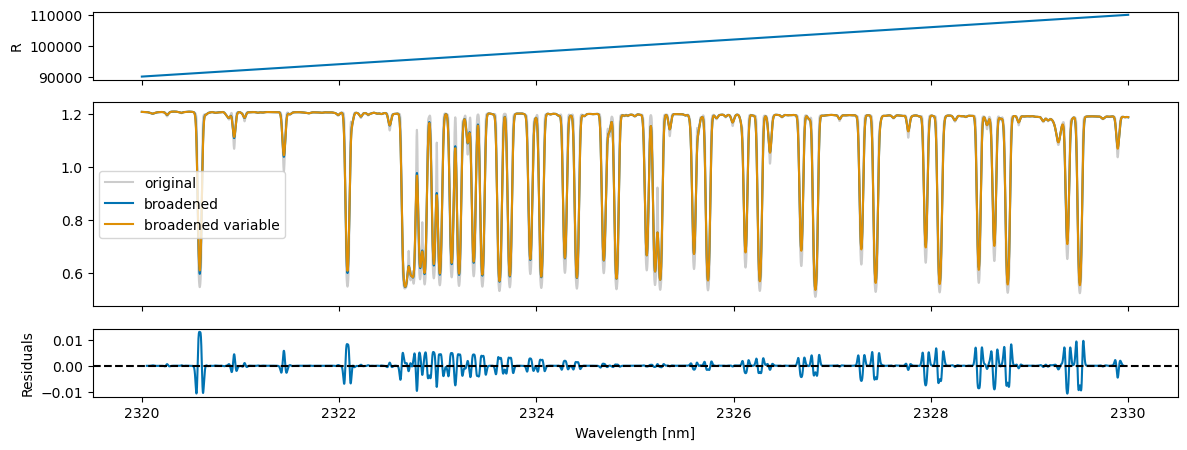

In [25]:
# Define a resolution vector changing from 95k to 105k
dR = 10e3
R_vector = np.linspace(R-dR, R+dR, len(wave))
fwhm_vector = 2.998e5/R_vector

flux_broadpy_fwhm_variable = InstrumentalBroadening(wave, flux)(fwhm=fwhm_vector, kernel='gaussian_variable')
# plot
fig, _ax = plt.subplots(3, 1, figsize=(14, 5), sharex=True, gridspec_kw={'height_ratios': [1, 3, 1]})
ax_res = _ax[0]
ax = _ax[1:]

ax_res.plot(wave, R_vector)
ax_res.set(ylabel='R')

ax[0].plot(wave, flux, label='original', color='black', alpha=0.2)
ax[0].plot(wave, flux_broadpy, label='broadened')
ax[0].plot(wave, flux_broadpy_fwhm_variable, label='broadened variable')

ax[0].legend()

residuals = flux_broadpy_fwhm_variable - flux_broadpy
n_edge = 2 * int(np.mean(wave) / np.mean(np.diff(wave)) / R_vector.min())
residuals[:n_edge] = residuals[-n_edge:] = np.nan
ax[1].plot(wave, residuals)
ax[1].axhline(0, color='black', ls='--')
ax[1].set_ylabel('Residuals')
ax[1].set_xlabel('Wavelength [nm]')
plt.show()

